In [4]:
import pandas as pd
import numpy as np
import math
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
from keras.optimizers import adam, adadelta, adagrad

sns.set(color_codes = True)
sns.set_palette(sns.color_palette("muted"))

from itertools import tee, islice
from ROOT import TFile, TCanvas, TPad, TPaveLabel, TPaveText, TTree, TH1F, TF1
from root_numpy import root2array, tree2array, array2tree, array2root
import sys
from ROOT import gROOT, AddressOf
from root_numpy import root2array, rec2array
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.ticker as ticker
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn import tree

In [2]:
signal = '/eos/home-s/sraj/M.Sc._Thesis/data_files/output_TprimeBToTH_Hgg_M-600_LH_TuneCP5_PSweights_13TeV-madgraph_pythia8.root'
back_1 = '/eos/home-s/sraj/M.Sc._Thesis/data_files/output_TTGG_0Jets_TuneCP5_13TeV_amcatnlo_madspin_pythia8.root'
back_01= '/eos/home-s/sraj/M.Sc._Thesis/data_files/output_ttHJetToGG_M125_13TeV_amcatnloFXFX_madspin_pythia8.root'
back_02 = '/eos/home-s/sraj/M.Sc._Thesis/data_files/output_VBFHToGG_M125_13TeV_amcatnlo_pythia8.root'
back_03 = '/eos/home-s/sraj/M.Sc._Thesis/data_files/output_VHToGG_M125_13TeV_amcatnloFXFX_madspin_pythia8.root'
back_04 = '/eos/home-s/sraj/M.Sc._Thesis/data_files/output_THQ_ctcvcp_HToGG_M125_13TeV-madgraph-pythia8.root'
back_05= '/eos/home-s/sraj/M.Sc._Thesis/data_files/output_GluGluHToGG_M125_TuneCP5_13TeV-amcatnloFXFX-pythia8.root'

In [3]:
treeName_back_1 ="tagsDumper/trees/ttgg_13TeV_THQLeptonicTag" 
treeName_signal = "tagsDumper/trees/Tprime_600_13TeV_THQLeptonicTag"
treeName_back_05 = "tagsDumper/trees/ggh_125_13TeV_THQLeptonicTag"
treeName_back_04 = "tagsDumper/trees/thq_125_13TeV_THQLeptonicTag"
treeName_back_03 = "tagsDumper/trees/vh_125_13TeV_THQLeptonicTag"
treeName_back_02 = 'tagsDumper/trees/vbf_125_13TeV_THQLeptonicTag'
treeName_back_01 = "tagsDumper/trees/tth_125_13TeV_THQLeptonicTag"

In [5]:
columns = ['dipho_leadPt',
             'dipho_mass',
             'dipho_leadEta',
             'dipho_subleadEta',
             'dipho_leadIDMVA',
             'dipho_subleadIDMVA',
             'dipho_lead_haspixelseed',
             'dipho_sublead_haspixelseed',
             'n_jets',
             'n_bjets',
             'n_centraljets',
             'lepton_charge',
             'lepton_leadPt',
             'lepton_leadEta',
             'fwdjet1_pt',
             'fwdjet1_eta',
             'fwdjet1_discr',
             'top_mt',
             'dr_tHchainfwdjet',
             'dr_leptonbjet',
             'dr_leptonfwdjet',
             'dr_bjetfwdjet',
             'dr_leadphofwdjet',
             'dr_subleadphofwdjet',
             'bjet1_pt',
             'bjet2_pt',
             'bjet3_pt',
             'bjet1_eta',
             'bjet2_eta',
             'bjet3_eta',
             'bjet1_discr',
             'bjet2_discr',
             'bjet3_discr',
             'jet1_pt',
             'jet2_pt',
             'jet3_pt',
             'jet1_eta',
             'jet2_eta',
             'jet3_eta',
             'jet1_discr',
             'jet2_discr',
             'jet3_discr']
             

In [6]:
signal_Tprime600 = root2array(signal, treeName_signal, columns)   #Signal TPrime at 600TeV
back_ttgg = root2array(back_1, treeName_back_1, columns)     # ttgg background(Not using this)
back_tth = root2array(back_01, treeName_back_01, columns)      
back_vbf = root2array(back_02, treeName_back_02, columns)
back_vh = root2array(back_03, treeName_back_03, columns)
back_thq = root2array(back_04, treeName_back_04, columns)
back_ggh = root2array(back_05, treeName_back_05, columns)

In [7]:
signal_Tprime600 = pd.DataFrame(signal_Tprime600)            #Signal for the testing
back_tth = pd.DataFrame(back_tth)          #tth background dataframe 
back_vbf = pd.DataFrame(back_vbf)             #vbf background dataframe 
back_vh = pd.DataFrame(back_vh)             #vh background dataframe 
back_thq = pd.DataFrame(back_thq) #thq background dataframe 
back_ggh = pd.DataFrame(back_ggh) #ggh background dataframe 
back_ttgg = pd.DataFrame(back_ttgg)

In [8]:
signal_Tprime600.head()

,dipho_leadPt,dipho_mass,dipho_leadEta,dipho_subleadEta,dipho_leadIDMVA,dipho_subleadIDMVA,dipho_lead_haspixelseed,dipho_sublead_haspixelseed,n_jets,n_bjets,...,bjet3_discr,jet1_pt,jet2_pt,jet3_pt,jet1_eta,jet2_eta,jet3_eta,jet1_discr,jet2_discr,jet3_discr
0,199.472260,126.641273,0.084015,1.195149,0.957987,0.687579,0.0,0.0,3.0,1.0,...,-999.0,84.649239,74.393456,32.669273,-0.487586,-3.465604,-2.688962,0.542797,-2.000000,-2.0
1,217.392303,124.014992,-0.121357,-0.101361,0.872169,0.967785,0.0,0.0,2.0,1.0,...,-999.0,112.434402,84.011833,-999.000000,0.293124,2.278897,-999.000000,0.638937,0.721447,-999.0
2,121.089691,123.836288,0.842742,1.373165,0.888976,0.919611,0.0,0.0,4.0,1.0,...,-999.0,91.825996,62.056263,38.143219,3.149675,-3.128838,4.403498,-2.000000,-2.000000,-2.0
3,158.326920,122.239555,0.202652,0.260665,0.956062,0.762749,0.0,0.0,2.0,1.0,...,-999.0,87.551056,85.922279,-999.000000,1.111560,2.848130,-999.000000,0.991427,-2.000000,-999.0
4,139.716736,123.026970,0.194240,0.534833,0.163151,0.361930,0.0,0.0,4.0,1.0,...,-999.0,177.258102,169.389847,27.921988,-0.204870,0.046312,-2.416145,0.998264,0.043448,-2.0


In [9]:
signal_Tprime600.columns

Index(['dipho_leadPt', 'dipho_mass', 'dipho_leadEta', 'dipho_subleadEta',
       'dipho_leadIDMVA', 'dipho_subleadIDMVA', 'dipho_lead_haspixelseed',
       'dipho_sublead_haspixelseed', 'n_jets', 'n_bjets', 'n_centraljets',
       'lepton_charge', 'lepton_leadPt', 'lepton_leadEta', 'fwdjet1_pt',
       'fwdjet1_eta', 'fwdjet1_discr', 'top_mt', 'dr_tHchainfwdjet',
       'dr_leptonbjet', 'dr_leptonfwdjet', 'dr_bjetfwdjet', 'dr_leadphofwdjet',
       'dr_subleadphofwdjet', 'bjet1_pt', 'bjet2_pt', 'bjet3_pt', 'bjet1_eta',
       'bjet2_eta', 'bjet3_eta', 'bjet1_discr', 'bjet2_discr', 'bjet3_discr',
       'jet1_pt', 'jet2_pt', 'jet3_pt', 'jet1_eta', 'jet2_eta', 'jet3_eta',
       'jet1_discr', 'jet2_discr', 'jet3_discr'],
      dtype='object')

In [10]:
signal_Tprime600.shape

(81013, 42)

In [11]:
assert signal_Tprime600.isnull().sum().sum() == 0

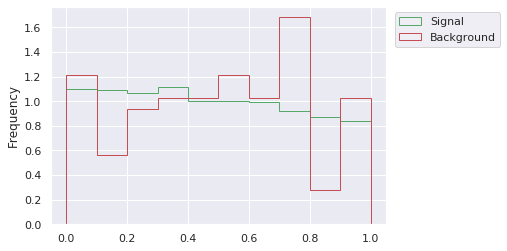

In [12]:
low_high=(0,1)
signal_Tprime600['lepton_leadEta'].plot.hist( alpha = 1, fill= False,
                                        histtype = 'step', edgecolor = 'g', density=True, range=low_high, label = 'Signal')
back_ggh['lepton_leadEta'].plot.hist( alpha = 1, fill= False,
                                        histtype = 'step', edgecolor = 'r', density=True, range=low_high, label = 'Background')
plt.legend(bbox_to_anchor=(1.01, 1), loc="upper left")
plt.show()


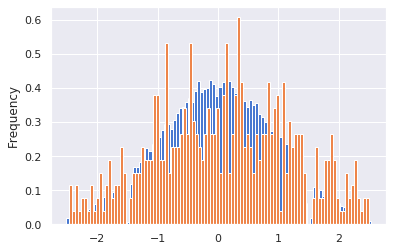

In [13]:
signal_Tprime600['dipho_leadEta'].plot.hist(bins=100, density = True)
back_ggh['dipho_leadEta'].plot.hist(bins=100, density = True)

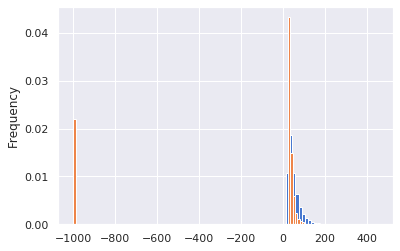

In [14]:
signal_Tprime600['jet3_pt'].plot.hist(bins=100, density = True)
back_ggh['jet3_pt'].plot.hist(bins=100, density = True)

In [15]:
signal = signal_Tprime600
backgr = pd.concat((back_tth, back_ggh, back_vbf, back_vh, back_ttgg), axis=0)

In [16]:
X = np.concatenate((signal_Tprime600, backgr))
y = np.concatenate((np.ones(signal_Tprime600.shape[0]),
                    np.zeros(backgr.shape[0])))

In [17]:
X.shape, y.shape

((239154, 42), (239154,))

In [18]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state =5)



In [19]:
X_train.shape, y_train.shape

((160233, 42), (160233,))

In [20]:
X_test.shape, y_test.shape

((78921, 42), (78921,))

In [21]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import keras
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.utils.vis_utils import plot_model
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adadelta
from tensorflow.keras import regularizers
from tensorflow.keras.initializers import RandomNormal, Constant
from keras import callbacks
from keras.models import load_model


In [22]:

clf = Sequential()
# clf.add(LSTM(1, return_sequences=True ))
clf.add(BatchNormalization(input_shape = (42,)))
# clf.add(Dropout(3))
clf.add(Dense(512, activation = 'relu',kernel_regularizer=regularizers.l2(0.001), kernel_initializer = 'lecun_uniform',name = 'dense_1'))
clf.add(BatchNormalization())
clf.add(Dropout(0.25))
clf.add(Dense(256, activation = 'relu',kernel_regularizer=regularizers.l2(0.001), kernel_initializer = 'lecun_uniform', name = 'dense_2'))
clf.add(Dropout(0.3))
clf.add(Dense(128, activation = 'relu',kernel_regularizer=regularizers.l2(0.001), kernel_initializer = 'lecun_uniform', name = 'dense_3'))
clf.add(BatchNormalization())
clf.add(Dropout(0.35))
clf.add(Dense(64, activation = 'relu',kernel_regularizer=regularizers.l2(0.001), kernel_initializer = 'lecun_uniform',name = 'dense_4'))
clf.add(BatchNormalization())
clf.add(Dropout(0.40))
clf.add(Dense(64, activation = 'relu',kernel_regularizer=regularizers.l2(0.001), kernel_initializer = 'lecun_uniform', name = 'dense_5'))
clf.add(BatchNormalization())
clf.add(Dropout(0.50))
clf.add(Dense(64, activation = 'relu',kernel_regularizer=regularizers.l2(0.001), kernel_initializer = 'lecun_uniform', name = 'dense_6'))
clf.add(BatchNormalization(momentum=0.99,epsilon=0.001,beta_initializer=RandomNormal(mean=0.0, stddev=0.05),gamma_initializer=Constant(value=0.9)))

# Output
clf.add(Dense(1, activation = 'sigmoid',kernel_regularizer=regularizers.l2(0.001), kernel_initializer = 'lecun_uniform', name = 'output'))
#compile model

# opt = SGD(lr=0.01, momentum=0.9)
clf.compile(loss = 'binary_crossentropy', 
            optimizer= 'adam',
            metrics=['accuracy'])
print('Summary of the built model...')
print(clf.summary())
# plot_model(clf, to_file='/eos/home-s/sraj/M.Sc._Thesis/Plot/''clf_plot_multiclass___.png', show_shapes=True, show_layer_names=True)

W0317 18:03:57.361287 140497758320448 deprecation_wrapper.py:119] From /cvmfs/sft.cern.ch/lcg/views/LCG_97apython3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0317 18:03:57.720368 140497758320448 deprecation_wrapper.py:119] From /cvmfs/sft.cern.ch/lcg/views/LCG_97apython3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0317 18:03:58.143167 140497758320448 deprecation_wrapper.py:119] From /cvmfs/sft.cern.ch/lcg/views/LCG_97apython3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0317 18:03:58.193450 140497758320448 deprecation_wrapper.py:119] From /cvmfs/sft.ce

Summary of the built model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 42)                168       
_________________________________________________________________
dense_1 (Dense)              (None, 512)               22016     
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)      

In [23]:
# simple early stopping
early_stopper = callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="auto")
model_check_point = callbacks.ModelCheckpoint("model(with all(except_thq) as background and TPrime_600 signal_train).h5", monitor = 'val_loss', verbose=True, 
                                              save_best_only=True, mode='auto')
# fit model
history = clf.fit(X_train, y_train, validation_split = 0.30, batch_size= 9000, epochs=100, verbose=1, callbacks=[early_stopper, model_check_point])
# evaluate the model

Train on 112163 samples, validate on 48070 samples
Epoch 1/100
112163/112163 [==============================] - 13s 115us/step - loss: 1.7117 - acc: 0.6267 - val_loss: 1.5154 - val_acc: 0.7705

Epoch 00001: val_loss improved from inf to 1.51541, saving model to model(with all(except_thq) as background and TPrime_600 signal_train).h5
Epoch 2/100
112163/112163 [==============================] - 8s 69us/step - loss: 1.4881 - acc: 0.7702 - val_loss: 1.4156 - val_acc: 0.8104

Epoch 00002: val_loss improved from 1.51541 to 1.41560, saving model to model(with all(except_thq) as background and TPrime_600 signal_train).h5
Epoch 3/100
112163/112163 [==============================] - 6s 58us/step - loss: 1.3366 - acc: 0.8106 - val_loss: 1.2614 - val_acc: 0.8333

Epoch 00003: val_loss improved from 1.41560 to 1.26136, saving model to model(with all(except_thq) as background and TPrime_600 signal_train).h5
Epoch 4/100
112163/112163 [==============================] - 7s 65us/step - loss: 1.2089 - ac

112163/112163 [==============================] - 6s 52us/step - loss: 0.3202 - acc: 0.8826 - val_loss: 0.5085 - val_acc: 0.7238

Epoch 00031: val_loss did not improve from 0.49627
Epoch 32/100
112163/112163 [==============================] - 6s 52us/step - loss: 0.3182 - acc: 0.8842 - val_loss: 0.4635 - val_acc: 0.7912

Epoch 00032: val_loss improved from 0.49627 to 0.46354, saving model to model(with all(except_thq) as background and TPrime_600 signal_train).h5
Epoch 33/100
112163/112163 [==============================] - 6s 50us/step - loss: 0.3130 - acc: 0.8853 - val_loss: 0.4827 - val_acc: 0.7557

Epoch 00033: val_loss did not improve from 0.46354
Epoch 34/100
112163/112163 [==============================] - 6s 49us/step - loss: 0.3112 - acc: 0.8859 - val_loss: 0.4668 - val_acc: 0.7691

Epoch 00034: val_loss did not improve from 0.46354
Epoch 35/100
112163/112163 [==============================] - 7s 61us/step - loss: 0.3076 - acc: 0.8865 - val_loss: 0.4717 - val_acc: 0.7721

Epoch


Epoch 00065: val_loss did not improve from 0.32514
Epoch 66/100
112163/112163 [==============================] - 6s 52us/step - loss: 0.2739 - acc: 0.9024 - val_loss: 0.3351 - val_acc: 0.8725

Epoch 00066: val_loss did not improve from 0.32514
Epoch 67/100
112163/112163 [==============================] - 8s 70us/step - loss: 0.2735 - acc: 0.9029 - val_loss: 0.3305 - val_acc: 0.8752

Epoch 00067: val_loss did not improve from 0.32514


2022-03-17 18:04:11.337224: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2022-03-17 18:04:11.509028: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2194915000 Hz
2022-03-17 18:04:11.536426: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x117c10d0 executing computations on platform Host. Devices:
2022-03-17 18:04:11.536506: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2022-03-17 18:04:12.779015: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a proper command-line flag, not via 

### Model Output

In [24]:
# Final evaluation of the model for DNN
# Testing Outputs
scores = clf.evaluate(X_train, y_train, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 90.56%


In [25]:
# Final evaluation of the model for DNN
# Testing Outputs
scores = clf.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 87.71%


In [26]:
%time

CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 23.6 µs


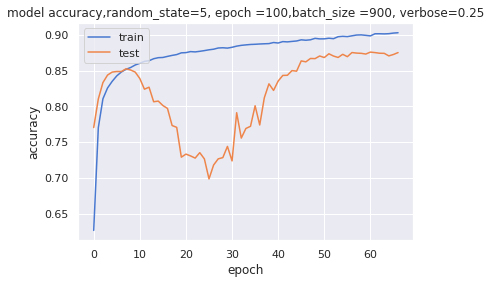

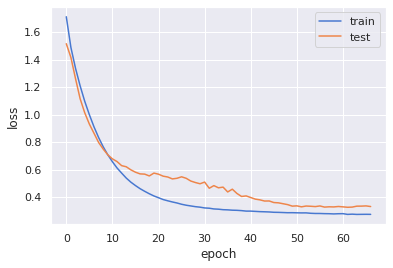

In [27]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy,random_state=5, epoch =100,batch_size =900, verbose=0.25')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('model_accuracy_TPrime_ttgg_&tth&thq.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
# plt.title('model loss,random_state=5, epoch =100,batch_size =900, verbose=0.25')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
# plt.savefig('loss_TPrime_ttgg_&tth&thq.png')
plt.show()

### Output Plotting

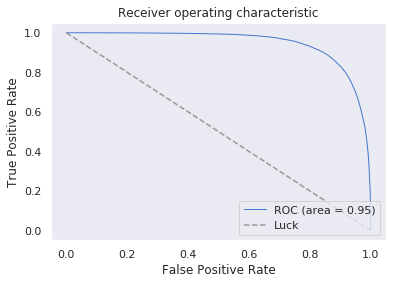

In [35]:
from sklearn.metrics import roc_curve, auc

decisions = clf.predict(X_test)

# Compute ROC curve and area under the curve
fpr, tpr, thresholds = roc_curve(y_test, decisions)
roc_auc = auc(fpr, tpr)
plt.plot(1-fpr, tpr, lw=1, label='ROC (area = %0.2f)'%(roc_auc))

plt.plot([0, 1], [1, 0], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
# plt.savefig("ROC_curve.png")
plt.show()

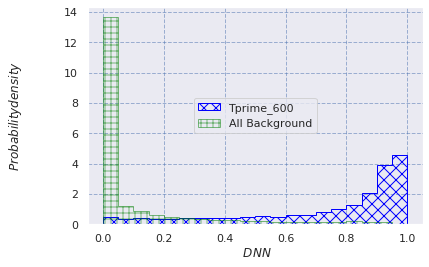

In [30]:
import matplotlib
plt.figure()                                     # new window
matplotlib.rcParams.update({'font.size':14})     # set all font sizes
tTest = clf.predict(X_test)
# if hasattr(clf, "decision_function"):
#     tTest = clf.decision_function(X_test)        # if available use decision_function
# else:
#     tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
tBkg = tTest[y_test==0]
tSig = tTest[y_test==1]
nBins = 20
tMin = np.floor(np.min(tTest))
tMax = np.ceil(np.max(tTest))
bins = np.linspace(tMin, tMax, nBins+1)
# plt.title('Multilayer perceptron')
plt.xlabel(' $DNN$', labelpad=3)
plt.ylabel('$Probability density$', labelpad=40)
n, bins, patches = plt.hist(tSig, bins=bins, density=True, histtype='step', fill=False, color ='dodgerblue' ,edgecolor = 'blue', hatch = 'XX',label='Tprime_600')
n, bins, patches = plt.hist(tBkg, bins=bins, density=True, histtype='step', fill=False,color = 'red' ,alpha=0.5, edgecolor = 'green', hatch='++', label = 'All Background')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed')
plt.legend(loc='center')
plt.title('')
# plt.savefig('/eos/home-s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/Plot_with_HDF5_files/''output_TPrime1200_all_background.png')
plt.show()

#### Save the Output as the ROOT file

In [89]:
from ROOT import TCanvas, TPad, TFormula, TF1, TPaveLabel, TH1F, TFile,TH1D
from ROOT import gROOT, gBenchmark

In [90]:
f = TFile("/eos/home-s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/ROOT_output/MyrootFile_after_training_Tprime_600_all_backgrounds_except_thq_test_with_TPrime600.root", "RECREATE")
# tree = TTree("root",  )
# How do we get that to create and fill with the background and signal
h_bak = TH1D("background", "background", 100, 0,1)
h_sig = TH1D("signal", "signal", 100, 0, 1)
h_sum_all = TH1D("data_obs", "data_obs", 100, 0, 1)
for i in tBkg:
    h_bak.Fill(i)
for j in tSig:
    h_sig.Fill(j)
h_sum_all.Add(h_bak) 
h_sum_all.Add(h_sig)



f.Write()
f.Close()

### Load model

In [36]:
loaded_model = load_model("model(with all(except_thq) as background and TPrime_600 signal_train).h5")

In [ ]:
import h5py

# hf.create_dataset('dataset_1', h)


In [ ]:
# from keras.models import model_from_json
# model_json = clf.to_json()
# with open("model(with all background except thq and TPrime_600 signal_train).json", "w") as json_file:
#     json_file.write(model_json)
# #serialize weights to HDF5
# clf.save_weights("model(with all background except thq and TPrime_600 signal_train).h5")
# print("saved trained model with combined background and a signal to disk")

In [ ]:
# # load json and create model
# json_file = open('model(with all background except thq and TPrime_600 signal_train).json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# # load weights into new model
# loaded_model.load_weights("model(with all background except thq and TPrime_600 signal_train).h5")
# print("Loaded model from disk")

In [37]:
# evaluate loaded model on test data of TPrime_600
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test)

78921/78921 [==============================] - 17s 217us/step


In [38]:
# Final evaluation of the model for DNN
# Testing Outputs
scores = loaded_model.evaluate(X_test, y_test, verbose=0)
print('It should be compatible with the previous output from the test dataset: \n'"Here the Accuracy ouput is: \n Accuracy: %.2f%%" % (scores[1]*100))


It should be compatible with the previous output from the test dataset: 
Here the Accuracy ouput is: 
 Accuracy: 87.83%


In [39]:
print(X_test.shape)
print(y_test.shape)

(78921, 42)
(78921,)


### TPrime 1200GeV Prime

In [40]:
# Load Testing dataset
signal_0 = '/eos/home-s/sraj/M.Sc._Thesis/data_files/output_TprimeBToTH_Hgg_M-1200_LH_TuneCP5_PSweights_13TeV-madgraph_pythia8.root'
treeName_signal_0 = "tagsDumper/trees/Tprime_1200_13TeV_THQLeptonicTag"
signal_Tprime1200 = root2array(signal_0, treeName_signal_0, columns)   #Signal TPrime at 600TeV

In [41]:
signal_Tprime1200 = pd.DataFrame(signal_Tprime1200)

In [42]:
signal_Tprime1200.head()

,dipho_leadPt,dipho_mass,dipho_leadEta,dipho_subleadEta,dipho_leadIDMVA,dipho_subleadIDMVA,dipho_lead_haspixelseed,dipho_sublead_haspixelseed,n_jets,n_bjets,...,bjet3_discr,jet1_pt,jet2_pt,jet3_pt,jet1_eta,jet2_eta,jet3_eta,jet1_discr,jet2_discr,jet3_discr
0,534.582397,125.027214,0.566175,0.996379,0.944314,0.929853,0.0,0.0,5.0,2.0,...,-999.000000,311.581604,144.228638,90.022743,0.048455,-2.035239,3.420674,0.985339,0.047269,-2.000000
1,287.602081,124.728577,-0.733117,-0.519446,0.959960,0.918737,0.0,0.0,5.0,3.0,...,0.254300,159.142563,93.359550,60.414616,0.157884,-2.040476,2.550436,0.254300,0.030940,0.505706
2,246.845337,123.324104,-0.460441,-0.968103,0.922660,0.970355,0.0,0.0,2.0,1.0,...,-999.000000,58.944019,48.547359,-999.000000,-2.324409,-0.171253,-999.000000,0.069687,0.999494,-999.000000
3,530.529053,124.927475,-0.195753,-0.550637,0.968185,0.959774,0.0,0.0,3.0,1.0,...,-999.000000,283.501984,92.928520,29.110281,-0.501745,4.469100,-2.801659,0.998836,-2.000000,-2.000000
4,421.636475,124.109444,0.551736,0.886035,0.975925,0.969419,0.0,0.0,6.0,3.0,...,0.173882,158.900589,154.219620,103.105125,2.175221,-0.654846,-2.812661,0.999373,0.036432,-2.000000


In [43]:
signal_Tprime1200.shape

(107628, 42)

In [44]:
X_1 = np.concatenate((signal_Tprime1200, backgr))
y_1 = np.concatenate((np.ones(signal_Tprime1200.shape[0]),
                    np.zeros(backgr.shape[0])))

In [45]:
X_1_train,X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.33, random_state =5)


In [46]:
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_1_test, y_1_test)

87704/87704 [==============================] - 17s 199us/step


In [47]:
# Final evaluation of the model for DNN
# Testing Outputs
scores = loaded_model.evaluate(X_1_test, y_1_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 67.97%


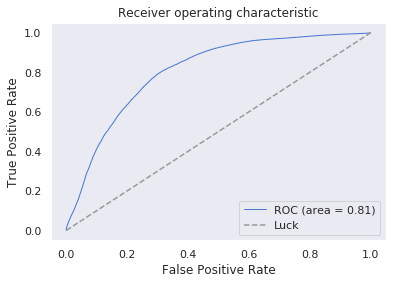

In [48]:
from sklearn.metrics import roc_curve, auc

decisions = loaded_model.predict(X_1_test)

# Compute ROC curve and area under the curve
fpr, tpr, thresholds = roc_curve(y_1_test, decisions)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)'%(roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
# plt.savefig("ROC_curve.png")
plt.show()

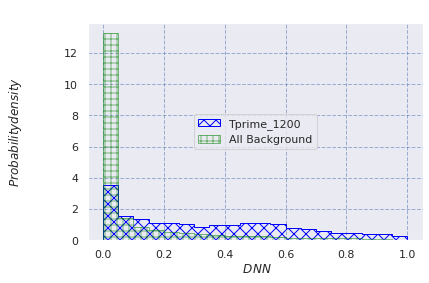

In [49]:
import matplotlib
plt.figure()                                     # new window
matplotlib.rcParams.update({'font.size':14})     # set all font sizes
tTest = loaded_model.predict(X_1_test)
# if hasattr(clf, "decision_function"):
#     tTest = clf.decision_function(X_test)        # if available use decision_function
# else:
#     tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
tBkg_1 = tTest[y_1_test==0]
tSig_1 = tTest[y_1_test==1]
nBins = 20
tMin = np.floor(np.min(tTest))
tMax = np.ceil(np.max(tTest))
bins = np.linspace(tMin, tMax, nBins+1)
# plt.title('Multilayer perceptron')
plt.xlabel(' $DNN$', labelpad=3)
plt.ylabel('$Probability density$', labelpad=40)
n, bins, patches = plt.hist(tSig_1, bins=bins, density=True, histtype='step', fill=False, color ='dodgerblue' ,edgecolor = 'blue', hatch = 'XX',label='Tprime_1200')
n, bins, patches = plt.hist(tBkg_1, bins=bins, density=True, histtype='step', fill=False,color = 'red' ,alpha=0.5, edgecolor = 'green', hatch='++', label = 'All Background')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed')
plt.legend(loc='center')
plt.title(' ')
# plt.savefig('/eos/home-s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/Plot_with_HDF5_files/''output_TPrime1200_all_background.png')
plt.show()

## testing on TPrime_900GeV


In [50]:
# Load Testing dataset
signal_1 = '/eos/user/p/prsaha/for_Shivam/output_TprimeBToTH_Hgg_M-900_LH_TuneCP5_PSweights_13TeV-madgraph_pythia8.root/'
treeName_signal_1 = "tagsDumper/trees/Tprime_900_13TeV_THQLeptonicTag"
signal_Tprime900 = root2array(signal_1, treeName_signal_1, columns)   #Signal TPrime at 600TeV

In [51]:
signal_Tprime900;
signal_Tprime900 = pd.DataFrame(signal_Tprime900)

In [52]:
X_2 = np.concatenate((signal_Tprime900, backgr))
y_2 = np.concatenate((np.ones(signal_Tprime900.shape[0]),
                    np.zeros(backgr.shape[0])))


In [53]:
X_2_train,X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.33, random_state =5)


In [54]:
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_2_test, y_2_test)

85504/85504 [==============================] - 16s 191us/step


In [55]:
# Final evaluation of the model for DNN
# Testing Outputs
scores = loaded_model.evaluate(X_2_test, y_2_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 81.53%


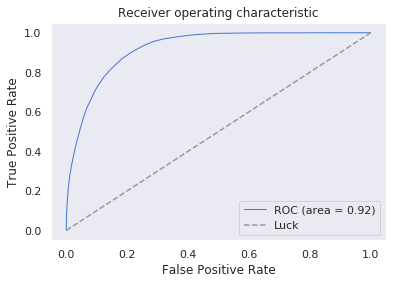

In [56]:
from sklearn.metrics import roc_curve, auc

decisions = loaded_model.predict(X_2_test)

# Compute ROC curve and area under the curve
fpr, tpr, thresholds = roc_curve(y_2_test, decisions)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)'%(roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
# plt.savefig("ROC_curve.png")
plt.show()

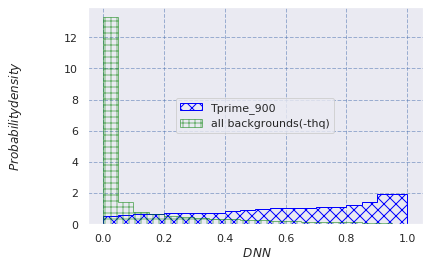

In [57]:
import matplotlib
plt.figure()                                     # new window
matplotlib.rcParams.update({'font.size':14})     # set all font sizes
tTest = loaded_model.predict(X_2_test)
# if hasattr(clf, "decision_function"):
#     tTest = clf.decision_function(X_test)        # if available use decision_function
# else:
#     tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
tBkg_2 = tTest[y_2_test==0]
tSig_2 = tTest[y_2_test==1]
nBins = 20
tMin = np.floor(np.min(tTest))
tMax = np.ceil(np.max(tTest))
bins = np.linspace(tMin, tMax, nBins+1)
# plt.title('Multilayer perceptron')
plt.xlabel(' $DNN$', labelpad=3)
plt.ylabel('$Probability density$', labelpad=40)
n, bins, patches = plt.hist(tSig_2, bins=bins, density=True, histtype='step', fill=False, color ='dodgerblue' ,edgecolor = 'blue', hatch = 'XX',label='Tprime_900')
n, bins, patches = plt.hist(tBkg_2, bins=bins, density=True, histtype='step', fill=False,color = 'red' ,alpha=0.5, edgecolor = 'green', hatch='++', label = 'all backgrounds(-thq)')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed')
plt.legend(loc='center')
plt.title('')
# plt.savefig('/eos/home-s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/Plot_with_HDF5_files/''output_TPrime1200_all_background.png')
plt.show()

In [91]:
f = TFile("/eos/home-s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/ROOT_output/MyrootFile_after_training_Tprime_600_all_backgrounds_except_thq_test_with_TPrime900.root", "RECREATE")
# tree = TTree("root",  )
# How do we get that to create and fill with the background and signal
h_bak = TH1D("background", "background", 100, 0,1)
h_sig = TH1D("signal", "signal", 100, 0, 1)
h_sum_all = TH1D("data_obs", "data_obs", 100, 0, 1)
for i in tBkg_2:
    h_bak.Fill(i)
for j in tSig_2:
    h_sig.Fill(j)
h_sum_all.Add(h_bak) 
h_sum_all.Add(h_sig)



f.Write()
f.Close()

# TPrime 675


In [58]:
# Load Testing dataset
signal_2 = '/eos/user/p/prsaha/for_Shivam/output_TprimeBToTH_Hgg_M-675_LH_TuneCP5_PSweights_13TeV-madgraph_pythia8.root'
treeName_signal_2 = "tagsDumper/trees/Tprime_675_13TeV_THQLeptonicTag"
signal_Tprime_675 = root2array(signal_2, treeName_signal_2, columns)   #Signal TPrime at 600TeV

In [59]:
signal_Tprime_675;
signal_Tprime675 = pd.DataFrame(signal_Tprime_675)

In [60]:
signal_Tprime675.shape

(88237, 42)

In [61]:
# signal_Tprime675.median
X_3 = np.concatenate((signal_Tprime675, backgr))
y_3 = np.concatenate((np.ones(signal_Tprime675.shape[0]),
                    np.zeros(backgr.shape[0])))

In [62]:
X_3_train,X_3_test, y_3_train, y_3_test = train_test_split(X_3, y_3, test_size=0.33, random_state =5)


In [63]:
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_3_test, y_3_test)

81305/81305 [==============================] - 9s 109us/step


In [64]:
# Final evaluation of the model for DNN
# Testing Outputs
scores = loaded_model.evaluate(X_3_test, y_3_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 89.40%


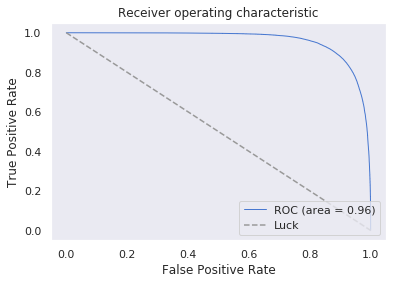

In [68]:
from sklearn.metrics import roc_curve, auc

decisions = loaded_model.predict(X_3_test)

# Compute ROC curve and area under the curve
fpr, tpr, thresholds = roc_curve(y_3_test, decisions)
roc_auc = auc(fpr, tpr)
plt.plot(1-fpr, tpr, lw=1, label='ROC (area = %0.2f)'%(roc_auc))

plt.plot([0, 1], [1, 0], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
# plt.savefig("ROC_curve.png")
plt.show()

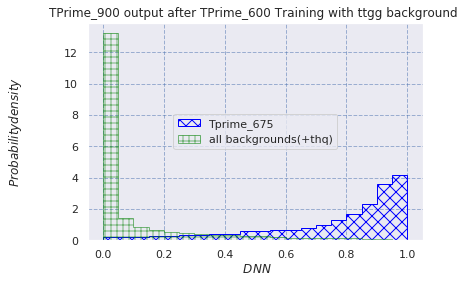

In [69]:
import matplotlib
plt.figure()                                     # new window
matplotlib.rcParams.update({'font.size':14})     # set all font sizes
tTest = loaded_model.predict(X_3_test)
# if hasattr(clf, "decision_function"):
#     tTest = clf.decision_function(X_test)        # if available use decision_function
# else:
#     tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
tBkg_3 = tTest[y_3_test==0]
tSig_3 = tTest[y_3_test==1]
nBins = 20
tMin = np.floor(np.min(tTest))
tMax = np.ceil(np.max(tTest))
bins = np.linspace(tMin, tMax, nBins+1)
# plt.title('Multilayer perceptron')
plt.xlabel(' $DNN$', labelpad=3)
plt.ylabel('$Probability density$', labelpad=40)
n, bins, patches = plt.hist(tSig_3, bins=bins, density=True, histtype='step', fill=False, color ='dodgerblue' ,edgecolor = 'blue', hatch = 'XX',label='Tprime_675')
n, bins, patches = plt.hist(tBkg_3, bins=bins, density=True, histtype='step', fill=False,color = 'red' ,alpha=0.5, edgecolor = 'green', hatch='++', label = 'all backgrounds(+thq)')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed')
plt.legend(loc='center')
plt.title('TPrime_900 output after TPrime_600 Training with ttgg background ')
# plt.savefig('/eos/home-s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/Plot_with_HDF5_files/''output_TPrime1200_all_background.png')
plt.show()

In [92]:
f = TFile("/eos/home-s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/ROOT_output/MyrootFile_after_training_Tprime_600_all_backgrounds_except_thq_test_with_TPrime675.root", "RECREATE")
# tree = TTree("root",  )
# How do we get that to create and fill with the background and signal
h_bak = TH1D("background", "background", 100, 0,1)
h_sig = TH1D("signal", "signal", 100, 0, 1)
h_sum_all = TH1D("data_obs", "data_obs", 100, 0, 1)
for i in tBkg_3:
    h_bak.Fill(i)
for j in tSig_3:
    h_sig.Fill(j)
h_sum_all.Add(h_bak) 
h_sum_all.Add(h_sig)



f.Write()
f.Close()

# TPrime 800


In [71]:
# Load Testing dataset
signal_3 = '/eos/user/p/prsaha/for_Shivam/output_TprimeBToTH_Hgg_M-800_LH_TuneCP5_PSweights_13TeV-madgraph_pythia8.root'
treeName_signal_3 = "tagsDumper/trees/Tprime_800_13TeV_THQLeptonicTag"
signal_Tprime_800 = root2array(signal_3, treeName_signal_3, columns)   #Signal TPrime at 600TeV



In [72]:
signal_Tprime_800;
signal_Tprime800 = pd.DataFrame(signal_Tprime_800)

In [73]:
signal_Tprime800.shape

(101761, 42)

In [74]:
# signal_Tprime675.median
X_4 = np.concatenate((signal_Tprime800, backgr))
y_4 = np.concatenate((np.ones(signal_Tprime800.shape[0]),
                    np.zeros(backgr.shape[0])))

In [75]:
X_4_train,X_4_test, y_4_train, y_4_test = train_test_split(X_4, y_4, test_size=0.33, random_state =5)


In [76]:
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_4_test, y_4_test)

85768/85768 [==============================] - 7s 87us/step


In [77]:
# Final evaluation of the model for DNN
# Testing Outputs
scores = loaded_model.evaluate(X_4_test, y_4_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 86.30%


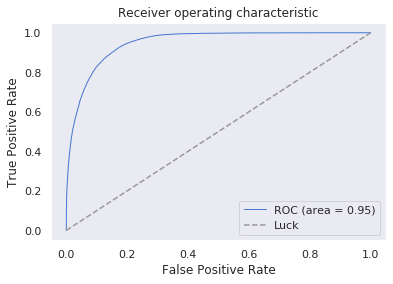

In [78]:
from sklearn.metrics import roc_curve, auc

decisions = loaded_model.predict(X_4_test)

# Compute ROC curve and area under the curve
fpr, tpr, thresholds = roc_curve(y_4_test, decisions)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)'%(roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
# plt.savefig("ROC_curve.png")
plt.show()

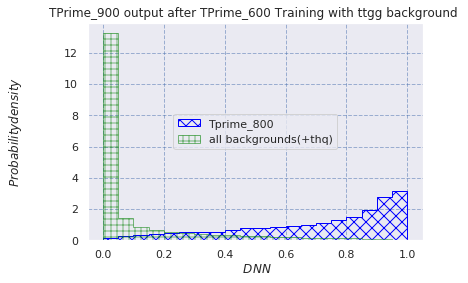

In [79]:
import matplotlib
plt.figure()                                     # new window
matplotlib.rcParams.update({'font.size':14})     # set all font sizes
tTest = loaded_model.predict(X_4_test)
# if hasattr(clf, "decision_function"):
#     tTest = clf.decision_function(X_test)        # if available use decision_function
# else:
#     tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
tBkg_4 = tTest[y_4_test==0]
tSig_4 = tTest[y_4_test==1]
nBins = 20
tMin = np.floor(np.min(tTest))
tMax = np.ceil(np.max(tTest))
bins = np.linspace(tMin, tMax, nBins+1)
# plt.title('Multilayer perceptron')
plt.xlabel(' $DNN$', labelpad=3)
plt.ylabel('$Probability density$', labelpad=40)
n, bins, patches = plt.hist(tSig_4, bins=bins, density=True, histtype='step', fill=False, color ='dodgerblue' ,edgecolor = 'blue', hatch = 'XX',label='Tprime_800')
n, bins, patches = plt.hist(tBkg_4, bins=bins, density=True, histtype='step', fill=False,color = 'red' ,alpha=0.5, edgecolor = 'green', hatch='++', label = 'all backgrounds(+thq)')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed')
plt.legend(loc='center')
plt.title('TPrime_900 output after TPrime_600 Training with ttgg background ')
# plt.savefig('/eos/home-s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/Plot_with_HDF5_files/''output_TPrime1200_all_background.png')
plt.show()

In [93]:
f = TFile("/eos/home-s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/ROOT_output/MyrootFile_after_training_Tprime_600_all_backgrounds_except_thq_test_with_TPrime800.root", "RECREATE")
# tree = TTree("root",  )
# How do we get that to create and fill with the background and signal
h_bak = TH1D("background", "background", 100, 0,1)
h_sig = TH1D("signal", "signal", 100, 0, 1)
h_sum_all = TH1D("data_obs", "data_obs", 100, 0, 1)
for i in tBkg_4:
    h_bak.Fill(i)
for j in tSig_4:
    h_sig.Fill(j)
h_sum_all.Add(h_bak) 
h_sum_all.Add(h_sig)



f.Write()
f.Close()

# TPrime 1000 GeV

In [80]:
# Load Testing dataset
signal_5 = '/eos/user/p/prsaha/for_Shivam/output_TprimeBToTH_Hgg_M-1000_LH_TuneCP5_PSweights_13TeV-madgraph_pythia8.root'
treeName_signal_5 = "tagsDumper/trees/Tprime_1000_13TeV_THQLeptonicTag"
signal_Tprime_1000 = root2array(signal_5, treeName_signal_5, columns)   #Signal TPrime at 600TeV



In [81]:
signal_Tprime_1000;
signal_Tprime1000= pd.DataFrame(signal_Tprime_1000)

In [82]:
signal_Tprime1000.shape

(105546, 42)

In [83]:
# signal_Tprime675.median
X_5 = np.concatenate((signal_Tprime1000, backgr))
y_5 = np.concatenate((np.ones(signal_Tprime1000.shape[0]),
                    np.zeros(backgr.shape[0])))

In [84]:
X_5_train,X_5_test, y_5_train, y_5_test = train_test_split(X_5, y_5, test_size=0.33, random_state =5)


In [85]:
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_5_test, y_5_test)

87017/87017 [==============================] - 7s 84us/step


In [86]:
# Final evaluation of the model for DNN
# Testing Outputs
scores = loaded_model.evaluate(X_5_test, y_5_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 76.19%


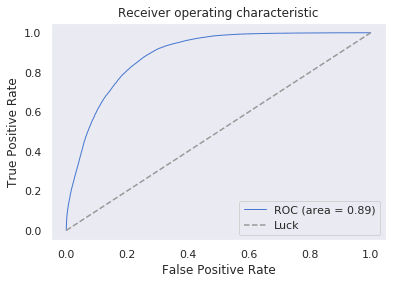

In [87]:
from sklearn.metrics import roc_curve, auc

decisions = loaded_model.predict(X_5_test)

# Compute ROC curve and area under the curve
fpr, tpr, thresholds = roc_curve(y_5_test, decisions)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)'%(roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
# plt.savefig("ROC_curve.png")
plt.show()

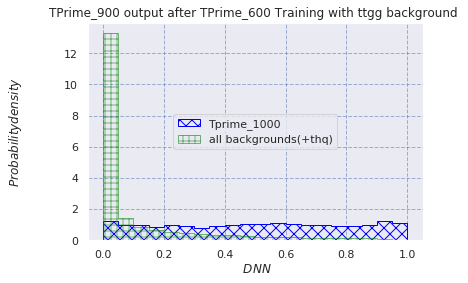

In [88]:
import matplotlib
plt.figure()                                     # new window
matplotlib.rcParams.update({'font.size':14})     # set all font sizes
tTest = loaded_model.predict(X_5_test)
# if hasattr(clf, "decision_function"):
#     tTest = clf.decision_function(X_test)        # if available use decision_function
# else:
#     tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
tBkg_5 = tTest[y_5_test==0]
tSig_5 = tTest[y_5_test==1]
nBins = 20
tMin = np.floor(np.min(tTest))
tMax = np.ceil(np.max(tTest))
bins = np.linspace(tMin, tMax, nBins+1)
# plt.title('Multilayer perceptron')
plt.xlabel(' $DNN$', labelpad=3)
plt.ylabel('$Probability density$', labelpad=40)
n, bins, patches = plt.hist(tSig_5, bins=bins, density=True, histtype='step', fill=False, color ='dodgerblue' ,edgecolor = 'blue', hatch = 'XX',label='Tprime_1000')
n, bins, patches = plt.hist(tBkg_5, bins=bins, density=True, histtype='step', fill=False,color = 'red' ,alpha=0.5, edgecolor = 'green', hatch='++', label = 'all backgrounds(+thq)')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed')
plt.legend(loc='center')
plt.title('TPrime_900 output after TPrime_600 Training with ttgg background ')
# plt.savefig('/eos/home-s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/Plot_with_HDF5_files/''output_TPrime1200_all_background.png')
plt.show()